In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [30]:
from sklearn.datasets import load_digits
import numpy as np

In [3]:
# load digits data
digits = load_digits()
data = digits.images
target = digits.target
print('Data shape : '+str(data.shape))
print('Data shape : '+str(target.shape))

Data shape : (1797, 8, 8)
Data shape : (1797,)


In [4]:
# split data into training and test set
train_imgs,test_imgs = tf.split(data, [1437,360])
train_tgt,test_tgt = tf.split(target, [1437,360])

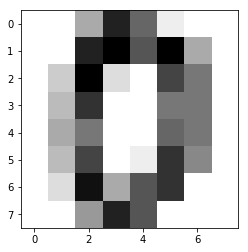

0


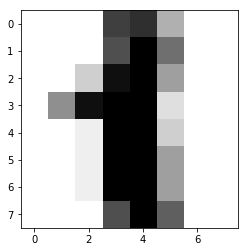

1


In [11]:
# Create one shot iterators for iteration

trn_ds = tf.data.Dataset.from_tensor_slices(train_imgs)
tgt_ds = tf.data.Dataset.from_tensor_slices(train_tgt)
img_iter = trn_ds.make_one_shot_iterator()
tgt_iter = tgt_ds.make_one_shot_iterator()
# extract an element
next_img = img_iter.get_next()
next_tgt = tgt_iter.get_next()
# 
with tf.Session() as sess:
    for i in range(2):
        img = sess.run(next_img)
        tgt = sess.run(next_tgt)
        plt.imshow(img, cmap="binary", interpolation="nearest")
        plt.show()
        print(tgt)

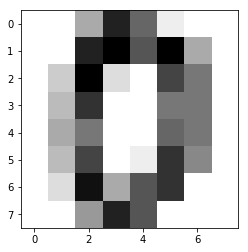

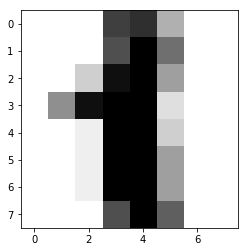

In [10]:
# Create initializable iterator
trn_ds = tf.data.Dataset.from_tensor_slices(train_imgs)
img_iter = trn_ds.make_initializable_iterator()           # <== CHANGE HERE
# extract an element
next_img = img_iter.get_next()

with tf.Session() as sess:
    sess.run(img_iter.initializer)                        # Initialize the iterator before using it.
    for i in range(2):
        img = sess.run(next_img)
        plt.imshow(img, cmap="binary", interpolation="nearest")
        plt.show()

(3, 8, 8)
Next batch


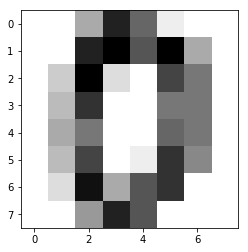

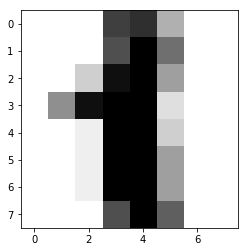

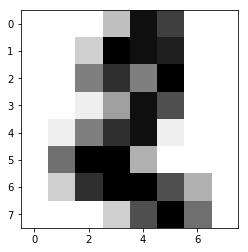

(3, 8, 8)
Next batch


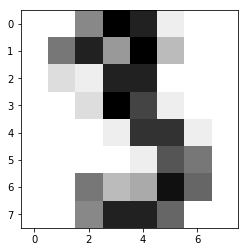

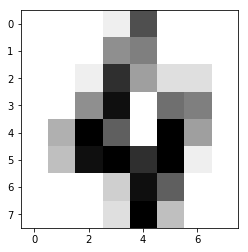

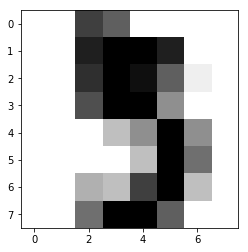

In [8]:
# Iterate over images in batch
trn_ds = tf.data.Dataset.from_tensor_slices(train_imgs).batch(3)
batch_iter = trn_ds.make_initializable_iterator()           
# extract an element
next_batch = batch_iter.get_next()

with tf.Session() as sess:
    sess.run(batch_iter.initializer)                        # Initialize the iterator
    for i in range(2):
        images = sess.run(next_batch)
        print(images.shape)
        print("Next batch")
        for img in images:            
            plt.imshow(img, cmap="binary", interpolation="nearest")
            plt.show()

In [21]:
# Create zipped dataset with images and their respective labels 
batch_size = 3

# Create training dataset
dx_train = tf.data.Dataset.from_tensor_slices(train_imgs).map(lambda z : tf.reshape(z, [-1]))
dy_train = tf.data.Dataset.from_tensor_slices(train_tgt)
train_ds = tf.data.Dataset.zip((dx_train, dy_train)).shuffle(500).repeat().batch(batch_size)

# Create testing dataset
dx_test = tf.data.Dataset.from_tensor_slices(test_imgs).map(lambda z : tf.reshape(z, [-1]))
dy_test = tf.data.Dataset.from_tensor_slices(test_tgt)
test_ds = tf.data.Dataset.zip((dx_test, dy_test)).shuffle(500).repeat().batch(batch_size)

# Create reinitializable iterators for datasets
iterator = tf.data.Iterator.from_structure(train_ds.output_types,
                                               train_ds.output_shapes)
next_element = iterator.get_next()

training_init_op = iterator.make_initializer(train_ds)
test_init_op = iterator.make_initializer(test_ds)

In [27]:
# Neural network model
n_inputs = 8 * 8
n_hidden1 = 100
n_outputs = 10


graph = tf.Graph()
with graph.as_default():
    with tf.name_scope("data"):
        # split data into training and test set
        train_imgs,test_imgs = tf.split(data, [1437,360])
        train_tgt,test_tgt = tf.split(target, [1437,360])
        # Create training dataset
        dx_train = tf.data.Dataset.from_tensor_slices(train_imgs).map(lambda z : tf.reshape(z, [-1]))
        dy_train = tf.data.Dataset.from_tensor_slices(train_tgt)
        train_ds = tf.data.Dataset.zip((dx_train, dy_train)).shuffle(500).repeat().batch(3)

        # Create testing dataset
        dx_test = tf.data.Dataset.from_tensor_slices(test_imgs).map(lambda z : tf.reshape(z, [-1]))
        dy_test = tf.data.Dataset.from_tensor_slices(test_tgt)
        test_ds = tf.data.Dataset.zip((dx_test, dy_test)).shuffle(500).repeat().batch(360)
        
    with tf.name_scope("ds_iters"):
        # Create reinitializable iterators for datasets
        iterator = tf.data.Iterator.from_structure(train_ds.output_types,
                                                       train_ds.output_shapes)
        next_element = iterator.get_next()
        training_init_op = iterator.make_initializer(train_ds)
        test_init_op = iterator.make_initializer(test_ds)
        
    with tf.name_scope("inputs"):
        X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
        y = tf.placeholder(tf.int32, shape=[None], name="y")
        
    with tf.name_scope("hidden1"):
        hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1") 

    with tf.name_scope("output"):
        logits = tf.layers.dense(hidden1, n_outputs, name="output")         
        Y_proba = tf.nn.softmax(logits)
    
    with tf.name_scope("train"):
        xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
        loss = tf.reduce_mean(xentropy)
        optimizer = tf.train.AdamOptimizer()
        training_op = optimizer.minimize(loss)

    with tf.name_scope("eval"):
        correct = tf.nn.in_top_k(logits, y, 1)
        accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

    with tf.name_scope("init_and_save"):
        init = tf.global_variables_initializer()
        saver = tf.train.Saver()

0 Train accuracy: 0.33333334
1 Train accuracy: 1.0
2 Train accuracy: 1.0
3 Train accuracy: 1.0
4 Train accuracy: 1.0
5 Train accuracy: 1.0
6 Train accuracy: 1.0
7 Train accuracy: 1.0
8 Train accuracy: 1.0
9 Train accuracy: 1.0
10 Train accuracy: 1.0
11 Train accuracy: 1.0
12 Train accuracy: 1.0
13 Train accuracy: 1.0
14 Train accuracy: 1.0
15 Train accuracy: 1.0
16 Train accuracy: 1.0
17 Train accuracy: 1.0
18 Train accuracy: 1.0
19 Train accuracy: 1.0
0 Test accuracy:  0.92777777
1 Test accuracy:  0.92777777
2 Test accuracy:  0.92777777
3 Test accuracy:  0.92777777
4 Test accuracy:  0.92777777
5 Test accuracy:  0.92777777
6 Test accuracy:  0.92777777
7 Test accuracy:  0.92777777
8 Test accuracy:  0.92777777
9 Test accuracy:  0.92777777
10 Test accuracy:  0.92777777
11 Test accuracy:  0.92777777
12 Test accuracy:  0.92777777
13 Test accuracy:  0.92777777
14 Test accuracy:  0.92777777
15 Test accuracy:  0.92777777
16 Test accuracy:  0.92777777
17 Test accuracy:  0.92777777
18 Test accur

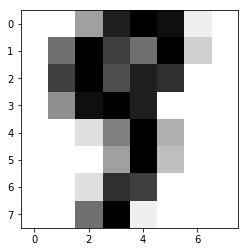

Actual class:9, Predicted class: 8, Main probabilities: 3:4.8%, 8:95.2%


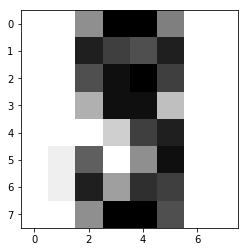

Actual class:9, Predicted class: 7, Main probabilities: 7:100.0%


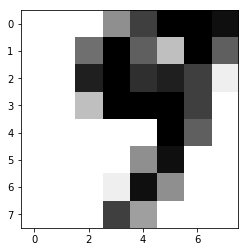

Actual class:3, Predicted class: 5, Main probabilities: 5:99.7%


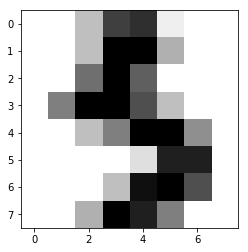

Actual class:9, Predicted class: 5, Main probabilities: 5:94.3%, 7:1.2%, 9:4.4%


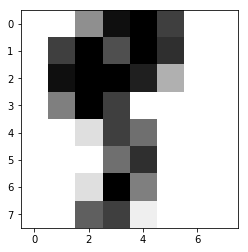

Actual class:8, Predicted class: 7, Main probabilities: 7:52.0%, 8:20.8%, 9:27.1%


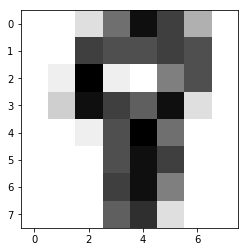

Actual class:8, Predicted class: 4, Main probabilities: 4:100.0%


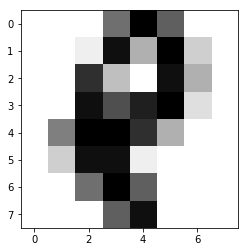

Actual class:3, Predicted class: 5, Main probabilities: 5:99.7%


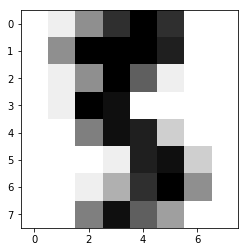

Actual class:8, Predicted class: 3, Main probabilities: 3:84.0%, 8:12.9%, 9:2.4%


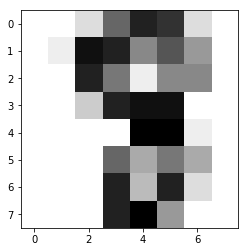

Actual class:7, Predicted class: 8, Main probabilities: 7:21.7%, 8:49.5%, 9:28.8%


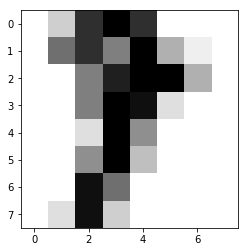

Actual class:0, Predicted class: 4, Main probabilities: 0:1.3%, 4:91.9%, 6:6.4%


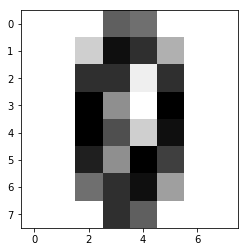

Actual class:8, Predicted class: 0, Main probabilities: 0:74.2%, 1:19.8%, 6:1.4%, 8:3.8%


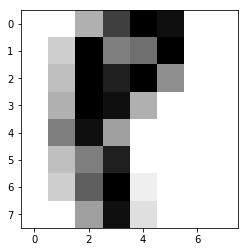

Actual class:4, Predicted class: 9, Main probabilities: 9:99.2%


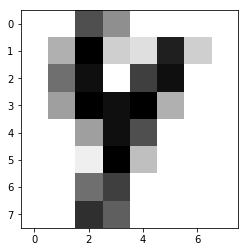

Actual class:4, Predicted class: 9, Main probabilities: 1:9.6%, 4:8.0%, 9:81.9%


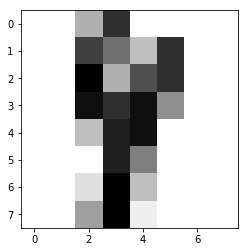

Actual class:3, Predicted class: 8, Main probabilities: 2:15.3%, 8:84.7%


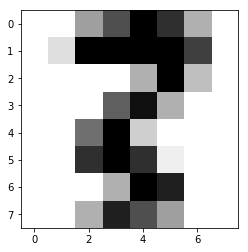

In [32]:
n_epochs = 20
trn_iter = 1437//3

tst_iter = 20 # 360//18

with tf.Session(graph=graph) as sess:
    init.run()
    sess.run(training_init_op)
    
    for epoch in range(n_epochs):
        for iteration in range(trn_iter):
            X_batch, y_batch = sess.run(next_element)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        print(epoch, "Train accuracy:", acc_train)
    sess.run(test_init_op)
    X_batch, y_batch = sess.run(next_element)
    for epoch in range(n_epochs):
#     for iteration in range(tst_iter):
        acc_test = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        print(epoch, "Test accuracy: ", acc_test)
        Y_proba_val = Y_proba.eval(feed_dict={X: X_batch})    
#     save_path = saver.save(sess, "./my_mnist_model")
    for example_index in range(200):
        y_proba = Y_proba_val[example_index]
        y_pred = np.argmax(y_proba)
        y_label = y_batch[example_index]
        if y_pred != y_label:
            print("Actual class:{}, Predicted class: {}, Main probabilities: {}".format(
                      y_label,
                      y_pred,
                      ", ".join(["{}:{:.1f}%".format(n, 100*p)
                                 for n, p in enumerate(y_proba) if p > 0.01])))
            plt.imshow(X_batch[example_index].reshape([8, 8]), cmap="binary", interpolation="nearest")
            plt.show()